# ch 8.5 Bagging
试编程实现Bagging，以决策树桩为基学习器，在西瓜数据集3.0a加上训练一个Bagging集成并与图8.6进行比较。

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
dataset = pd.read_csv('data/table_4_3_watermelon_3_0_num.csv')
dataset = dataset[['density','sugar_ratio','label']]

In [3]:
def train_bagging(dataset, num_base):
    base_learner = DecisionTreeClassifier()
    bagging = BaggingClassifier(base_learner, n_estimators=num_base)
    bagging.fit(dataset.ix[:,[0,1]], dataset.ix[:,2])
    return bagging

In [4]:
def print_error_weight(bagging):
    print('Base Learner error and weight:')
    for idx, err, weight in zip(range(1, 11), bagging.estimator_errors_, bagging.estimator_weights_):
        print('Base Learner-%d\t' % idx, err, '\t', weight)

In [5]:
def plot_boundary(dataset, bagging, plot_num, num_base):
    fig = plt.subplot(plot_num)
    test_density = np.array(dataset['density'])
    test_sugar_ratio = np.array(dataset['sugar_ratio'])
    x_step = (max(test_density) - min(test_density))/20
    y_step = (max(test_sugar_ratio) - min(test_sugar_ratio))/20
    test_x = np.arange(min(test_density)-5*x_step, max(test_density)+5*x_step, x_step)
    test_y = np.arange(min(test_sugar_ratio)-5*y_step, max(test_sugar_ratio)+5*y_step, y_step)
    test_data = np.transpose([np.tile(test_x, len(test_y)), np.repeat(test_y, len(test_x))])
    test_out = bagging.predict(test_data)
    for i in range(len(test_out)):
        if test_out[i]:
            plt.plot(test_data[i,0], test_data[i,1], 'bx', alpha=0.5)
        else:
            plt.plot(test_data[i,0], test_data[i,1], 'gx', alpha=0.5)
    dataset0 = dataset[dataset['label']==0]
    dataset1 = dataset[dataset['label']==1]
    plt.plot(list(dataset0['density']), list(dataset0['sugar_ratio']), 'g.')
    plt.plot(list(dataset1['density']), list(dataset1['sugar_ratio']), 'b.')
    plt.title('num_classifier='+str(num_base))
    plt.show()

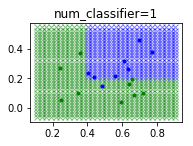

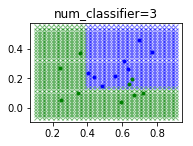

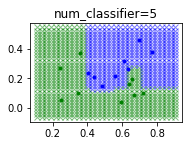

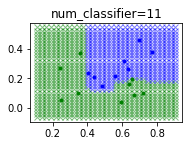

In [7]:
for i,j in zip([1,3,5,11],[221,222,223,224]):
    bag = train_bagging(dataset, num_base=i)
    plot_boundary(dataset, bag, j, i)